In [1]:
%pip install pandas numpy matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [31]:
print("hello world")
movies = pd.read_csv('data/movies.csv')
movies = movies.dropna()
movies

hello world


,Unnamed: 0,id,original_language,original_title,popularity,release_date,vote_average,vote_count,genre,overview,revenue,runtime,tagline
1,1,524434.0,en,Eternals,3365.535,2021-11-03,7.1,622.0,"['Action', 'Adventure', 'Science Fiction', 'Fa...",The Eternals are a team of ancient aliens who ...,165000000.0,157.0,In the beginning...
2,2,438631.0,en,Dune,2911.423,2021-09-15,8.0,3632.0,"['Action', 'Adventure', 'Science Fiction']","Paul Atreides, a brilliant and gifted young ma...",331116356.0,155.0,"Beyond fear, destiny awaits."
3,3,796499.0,en,Army of Thieves,2552.437,2021-10-27,6.9,555.0,"['Action', 'Crime', 'Thriller']",A mysterious woman recruits bank teller Ludwig...,0.0,127.0,"Before Vegas, one locksmith became a legend."
4,4,550988.0,en,Free Guy,1850.470,2021-08-11,7.8,3493.0,"['Comedy', 'Action', 'Adventure', 'Science Fic...",A bank teller called Guy realizes he is a back...,331096766.0,115.0,Life's too short to be a background character.
5,5,574060.0,en,Gunpowder Milkshake,1453.423,2021-07-14,6.5,347.0,"['Action', 'Thriller', 'Crime']",In her turbulent life as a professional assass...,344931.0,114.0,Revenge is best served ice cold.
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10008,9994,28752.0,en,The Curse of the Werewolf,9.017,1961-05-01,6.6,110.0,['Horror'],A child conceived after a demented beggar rape...,0.0,93.0,HALF-MAN... HALF-WOLF... COMPELLED BY THE HIDE...
10010,9996,15934.0,en,El cantante,10.417,2006-09-12,7.0,80.0,"['History', 'Drama', 'Music']","The rise and fall of salsa singer, Héctor Lavo...",0.0,116.0,"Based on the true story of the King of Salsa, ..."
10011,9997,162215.0,en,How I Live Now,9.520,2013-09-10,6.6,705.0,"['Drama', 'Action', 'Thriller', 'War']",An American girl on holiday in the English cou...,0.0,101.0,Love will lead you home
10012,9998,5723.0,en,Once,9.267,2007-03-23,7.4,990.0,"['Drama', 'Music', 'Romance']",A vacuum repairman moonlights as a street musi...,20710513.0,85.0,How often do you find the right person?


https://rich-d-wilkinson.github.io/MATH3030/6.1-classical-mds.html

In [3]:
test_data = np.array([[0, 0], [1, 0], [0, 1], [-1, 0], [0, -1]])

In [62]:
def euclidean_dist(v1, v2):
    return np.sqrt(np.sum((v1 - v2) ** 2))

def distance_matrix(vectors):
    toRet = [[0] * len(vectors) for _ in range(len(vectors))]
    for i in range(len(vectors)):
        for j in range(len(vectors)):
            dist = euclidean_dist(vectors[i], vectors[j])
            toRet[i][j] = dist
            if i != j:
                toRet[j][i] = dist
    return np.array(toRet)

def centering_matrix(n): # dimension of centering matrix
    return np.identity(n) - np.ones((n, n)) / n

In [11]:
print(euclidean_dist(test_data[2], test_data[1]))
test_dmat = distance_matrix(test_data)
print(test_dmat)

1.4142135623730951
[[0.         1.         1.         1.         1.        ]
 [1.         0.         1.41421356 2.         1.41421356]
 [1.         1.41421356 0.         1.41421356 2.        ]
 [1.         2.         1.41421356 0.         1.41421356]
 [1.         1.41421356 2.         1.41421356 0.        ]]


In [61]:
def get_A(distance_matrix):
    return -0.5 * distance_matrix**2

def get_B(distance_matrix):
    A = get_A(distance_matrix)
    H = centering_matrix(len(distance_matrix))
    return H @ A @ H

In [14]:
print(get_A(test_dmat))
test_B = get_B(test_dmat)
print(test_B)

[[-0.  -0.5 -0.5 -0.5 -0.5]
 [-0.5 -0.  -1.  -2.  -1. ]
 [-0.5 -1.  -0.  -1.  -2. ]
 [-0.5 -2.  -1.  -0.  -1. ]
 [-0.5 -1.  -2.  -1.  -0. ]]
[[-8.49320614e-17 -1.66533454e-18 -1.66533454e-18 -1.55431223e-17
   6.66133815e-18]
 [ 3.88578059e-18  1.00000000e+00 -5.16253706e-17 -1.00000000e+00
  -7.10542736e-17]
 [ 2.88657986e-17 -5.44009282e-17  1.00000000e+00 -1.09912079e-16
  -1.00000000e+00]
 [ 5.66213743e-17 -1.00000000e+00 -1.09912079e-16  1.00000000e+00
  -1.01585407e-16]
 [ 9.54791801e-17 -9.88098492e-17 -1.00000000e+00 -9.88098492e-17
   1.00000000e+00]]


In [63]:
def get_mds_points(vectors, new_d=2):
    new_d = 2
    dist_mat = distance_matrix(vectors)
    B = get_B(dist_mat)

    # get eigenvalues and eigenvectors of B
    val, vec = np.linalg.eigh(B)

    # get indices for top new_d eigenvalues
    kept_ind = np.argsort(val)[::-1][:new_d]

    # take only top eigenvalues and corresponding eigenvectors
    V_new = np.array(vec[:, kept_ind])
    lam_new = np.diag(np.sqrt(val[kept_ind]))

    return V_new @ lam_new

In [64]:
mds_pts = get_mds_points(test_data)
print('Generated points:')
print(mds_pts)

print('Dist matrix for og points:')
print(distance_matrix(test_data))
print('Dist matrix for mds points:')
print(distance_matrix(mds_pts))

NameError: name 'test_data' is not defined

Now to apply to our dataset

In [36]:
movies = movies.dropna()

all_genres = set()
for genres in movies['genre']:
    parsed = genres.split('\'')
    for genre in parsed[1::2]:
        all_genres.add(genre)
all_genres = list(all_genres)

all_lang = set()
for lang in movies['original_language']:
    all_lang.add(lang)
all_lang = list(all_lang)



In [72]:
print(movies.iloc[0])
def construct_vec(movie):
    toRet = []
    toRet.append(movie['popularity'])
    toRet.append(movie['runtime'])
    toRet.append(movie['revenue'])

    for lang in all_lang:
        if lang == movie['original_language']:
            toRet.append(1)
        else:
            toRet.append(0)

    for genre in all_genres:
        if movie['genre'].find(genre) != -1:
            toRet.append(1)
        else:
            toRet.append(0)
    return np.array(toRet)
print(construct_vec(movies.iloc[0]))

def sampled_vecs(movies, num=100, rand=False):
    inds = []
    if rand:
        inds = list(range(7071))
        random.shuffle(inds)
        inds = inds[:num]
        print(inds)
    else:
        inds = list(range(num))
    mov_data = [construct_vec(movies.iloc[i]) for i in inds]
    mov_names = [movies.iloc[i]['original_title'] for i in inds]
    return np.array(mov_data), mov_names

Unnamed: 0                                                           1
id                                                            524434.0
original_language                                                   en
original_title                                                Eternals
popularity                                                    3365.535
release_date                                                2021-11-03
vote_average                                                       7.1
vote_count                                                       622.0
genre                ['Action', 'Adventure', 'Science Fiction', 'Fa...
overview             The Eternals are a team of ancient aliens who ...
revenue                                                    165000000.0
runtime                                                          157.0
tagline                                            In the beginning...
Name: 1, dtype: object
[3.365535e+03 1.570000e+02 1.650000e+08 0.000000e+00 0

In [73]:
mov_data, mov_names = sampled_vecs(movies)

print(mov_data)
print(mov_names)

inf_pts = get_mds_points(mov_data)
print(inf_pts)

[[3.36553500e+03 1.57000000e+02 1.65000000e+08 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [2.91142300e+03 1.55000000e+02 3.31116356e+08 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.55243700e+03 1.27000000e+02 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [2.08114000e+02 9.90000000e+01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.24855000e+02 1.12000000e+02 2.49014200e+07 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.15011000e+02 8.80000000e+01 1.76352150e+07 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
['Eternals', 'Dune', 'Army of Thieves', 'Free Guy', 'Gunpowder Milkshake', 'Venom', 'Halloween Kills', 'American Badger', 'The Addams Family 2', 'Shang-Chi and the Legend of the Ten Rings', 'Snake Eyes: G.I. Joe Origins', 'The Vault', 'The Deep House', 'I onde dager', 'Zone 414', '劇場版「鬼滅の刃」無限列車編', 'The Protégé', 'The Suicide Squad', 'Deathstroke: Knights & Dragons - The Movie', 'The Boss Baby: Fam

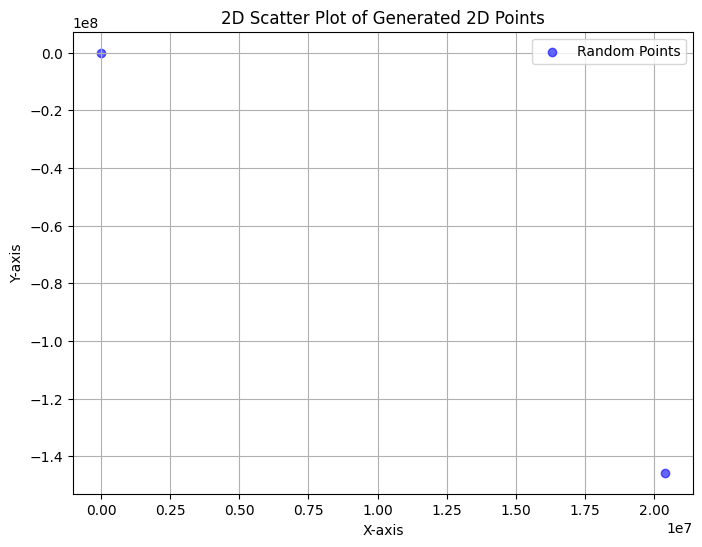

In [ ]:
x = inf_pts[:, 0]
y = inf_pts[:, 1]

plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', alpha=0.6, label='Random Points')
plt.title("2D Scatter Plot of Generated 2D Points")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.grid(True)
plt.legend()
plt.show()